In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
import sklearn
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,  sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state =7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state =11)

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3870, 8) (3870,)
(11610, 8) (11610,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [5]:
# 多输入多输出
input_wide = keras.layers.Input(shape =[5])
input_deep = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep], outputs = [output, output2] )

model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [6]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:,2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:,2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], [y_train, y_train], epochs = 100, validation_data = [[x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]], callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 61us/sample - loss: 2.0751 - dense_2_loss: 0.9891 - dense_3_loss: 1.0854 - val_loss: 1.3211 - val_dense_2_loss: 0.5496 - val_dense_3_loss: 0.7713
Epoch 2/100
11610/11610 [==============================] - 0s 33us/sample - loss: 1.2698 - dense_2_loss: 0.4906 - dense_3_loss: 0.7792 - val_loss: 1.1975 - val_dense_2_loss: 0.4825 - val_dense_3_loss: 0.7149
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1.0332 - dense_2_loss: 0.4423 - dense_3_loss: 0.5906 - val_loss: 1.0275 - val_dense_2_loss: 0.4446 - val_dense_3_loss: 0.5827
Epoch 4/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.9609 - dense_2_loss: 0.4186 - dense_3_loss: 0.5423 - val_loss: 0.9973 - val_dense_2_loss: 0.4461 - val_dense_3_loss: 0.5510
Epoch 5/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.9182 - dense_2_loss: 0.4011 - dense

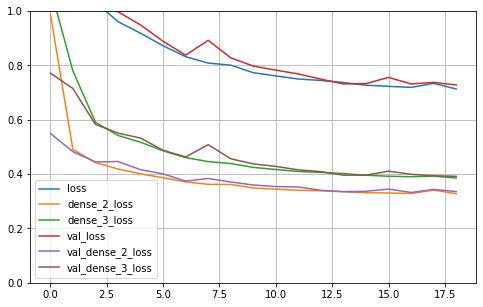

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [8]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep],  [y_test, y_test])

5160/5160 [==============================] - 0s 19us/sample - loss: 0.7108 - dense_2_loss: 0.3350 - dense_3_loss: 0.3781


[0.7107726684836454, 0.33497354, 0.3780723]